In [19]:
using Plots
using LaTeXStrings

## $$v_{n+1} = v_n + a_n \Delta t$$
## $$y_{n+1} = y_n + v_{n+1} \Delta t$$

In [5]:
function eulerCromer(v, y, a, Δt)
    v_new = v + (a * Δt)
    y_new = y + (v_new*Δt)
    return v_new, y_new
end

eulerCromer (generic function with 1 method)

In [73]:
#Set Initial Conditions
v₀ = 10.0 #Initial Velocity (Meters/second)
a = -9.8 #Total acceleration of the Sphere
Δt = 0.01 #Time Step (seconds)

#These three arrays store the numbers we calculate
y_arr = [0.0]
v_arr = [v₀]
t_arr = [0.0]

#While loop is chosen since runs required is unknown
while last(y_arr) >= 0
    #Call our function to get our new values after time step of 0.01
    tempV, tempY = eulerCromer(last(v_arr), last(y_arr), a, Δt)
    
    #Clunky push statements to update our arrays
    push!(y_arr, tempY)
    push!(v_arr, tempV)
    push!(t_arr, last(t_arr) + Δt)
end

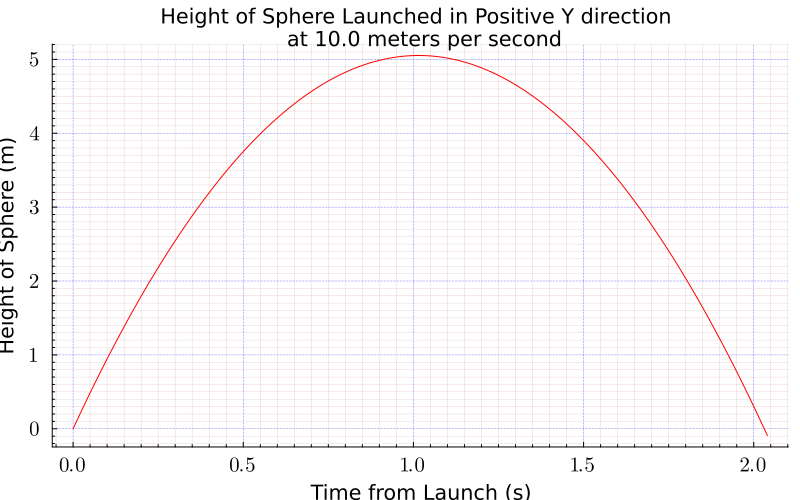

In [74]:
gr()
plot(t_arr, y_arr, legend = false, xlabel = "Time from Launch (s)", ylabel = "Height of Sphere (m)",
title = "Height of Sphere Launched in Positive Y direction \n at $v₀ meters per second", xgridstyle = :dash, 
ygridstyle = :dash, yformatter=:latex, xformatter=:latex,minorticks=10, minorgrid=true, minorgridcolor=:brown,
minorgridalpha=0.2, gridcolor=:blue, gridalpha=0.5, size=(800,500), guidefontsize=14, tickfontsize=14, bg = :white, linecolor= :red)

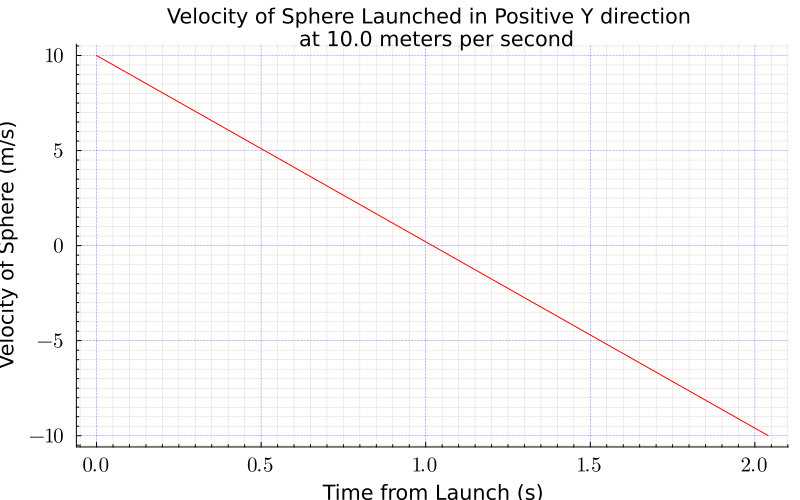

In [75]:
plot(t_arr, v_arr, legend = false, xlabel = "Time from Launch (s)", ylabel = "Velocity of Sphere (m/s)",
title = "Velocity of Sphere Launched in Positive Y direction \n at $v₀ meters per second", xgridstyle = :dash, ygridstyle = :dash,
yformatter=:latex, xformatter=:latex, minorticks=10, minorgrid=true, minorgridcolor=:brown, minorgridalpha=0.2, 
gridcolor=:blue, gridalpha=0.5, size=(800,500), guidefontsize=14, tickfontsize=14, bg = :white, linecolor= :red)

In [76]:
#Set Initial Conditions
v₀ = 10.0 #Initial Velocity (Meters/second)
b = 0.5 #Drag Coefficient (0.5 represents a sphere)
Δt = 0.01 #Time Step (seconds)
a = -9.8 + (v₀ * -b) #Total acceleration of the Sphere
#Note- acceleration is defined here to give initial acceleration, 
#but still must be updated during calculations, as v changes.

#These three arrays store the numbers we calculate
y_arr_ar = [0.0]
v_arr_ar = [v₀]
t_arr_ar = [0.0]

#While loop is chosen since runs required is unknown
while last(y_arr_ar) >= 0
    #Call our function to get our new values after time step of 0.01
    tempV, tempY = eulerCromer(last(v_arr_ar), last(y_arr_ar), a, Δt)
    #Clunky push statements to update our arrays
    push!(y_arr_ar, tempY)
    push!(v_arr_ar, tempV)
    push!(t_arr_ar, last(t_arr_ar) + Δt)
    #Update our acceleration with the new velocity
    a = -9.8 + (last(v_arr_ar) * -b)
end

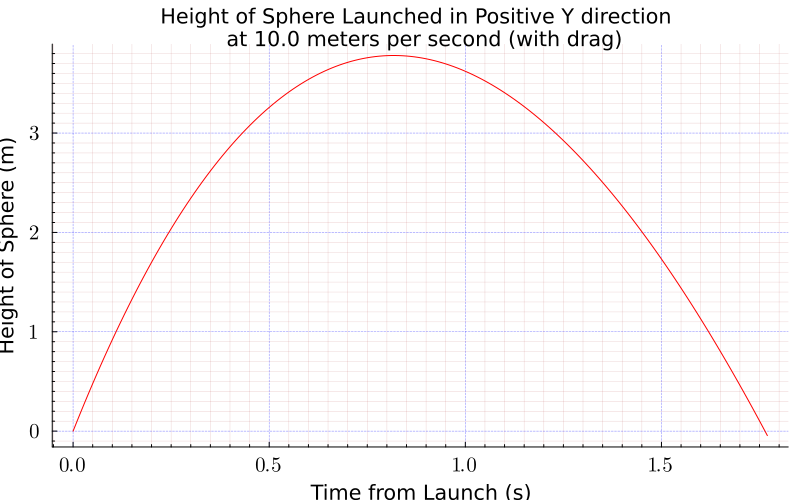

In [77]:
plot(t_arr_ar, y_arr_ar, legend = false, xlabel = "Time from Launch (s)", ylabel = "Height of Sphere (m)",
title = "Height of Sphere Launched in Positive Y direction \n at $v₀ meters per second (with drag)",
xgridstyle = :dash, ygridstyle = :dash, yformatter=:latex, xformatter=:latex,
minorticks=10, minorgrid=true, minorgridcolor=:brown, minorgridalpha=0.2, gridcolor=:blue, gridalpha=0.5, 
size=(800,500), guidefontsize=14, tickfontsize=14, bg = :white, linecolor= :red)

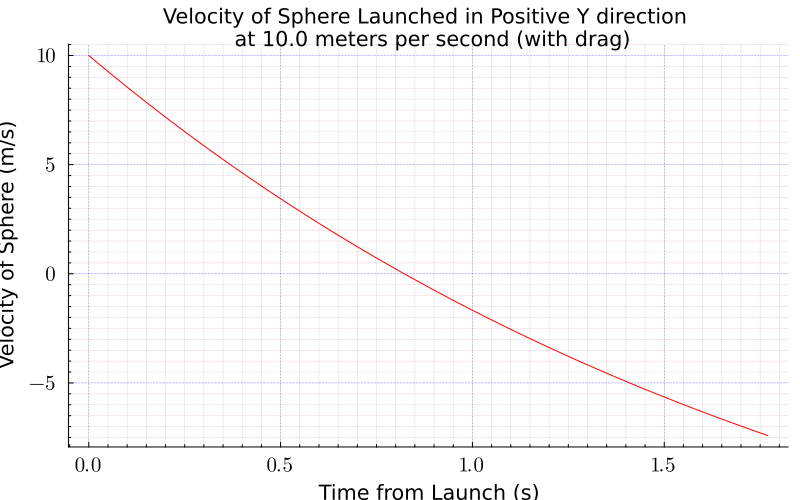

In [78]:
plot(t_arr_ar, v_arr_ar, legend = false, xlabel = "Time from Launch (s)", ylabel = "Velocity of Sphere (m/s)",
title = "Velocity of Sphere Launched in Positive Y direction \n at $v₀ meters per second (with drag)", 
xgridstyle = :dash, ygridstyle = :dash, yformatter=:latex, xformatter=:latex,
minorticks=10, minorgrid=true, minorgridcolor=:brown, minorgridalpha=0.2, gridcolor=:blue, gridalpha=0.5,
size=(800,500), guidefontsize=14, tickfontsize=14, bg = :white, linecolor= :red)

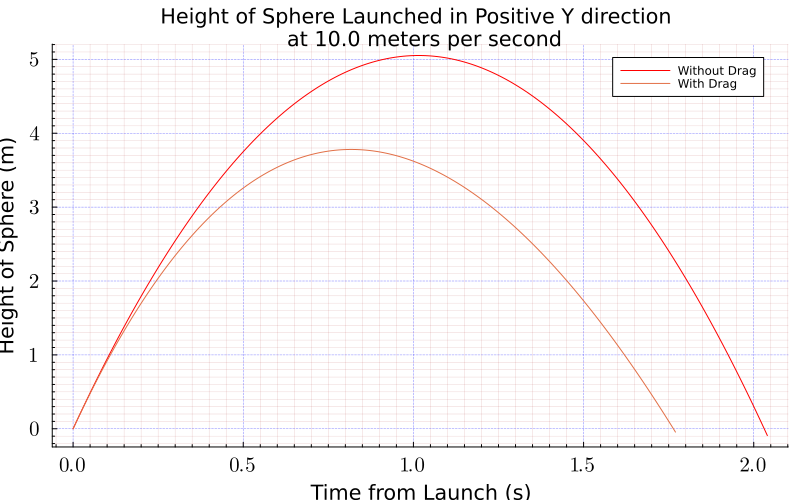

In [80]:
gr()
plot(t_arr, y_arr, legend =:topright, xlabel = "Time from Launch (s)", ylabel = "Height of Sphere (m)", label = "Without Drag",
title = "Height of Sphere Launched in Positive Y direction \n at $v₀ meters per second", xgridstyle = :dash, 
ygridstyle = :dash, yformatter=:latex, xformatter=:latex,minorticks=10, minorgrid=true, minorgridcolor=:brown,
minorgridalpha=0.2, gridcolor=:blue, gridalpha=0.5, size=(800,500), guidefontsize=14, tickfontsize=14, bg = :white, linecolor= :red)
plot!(t_arr_ar, y_arr_ar, label = "With Drag")